In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

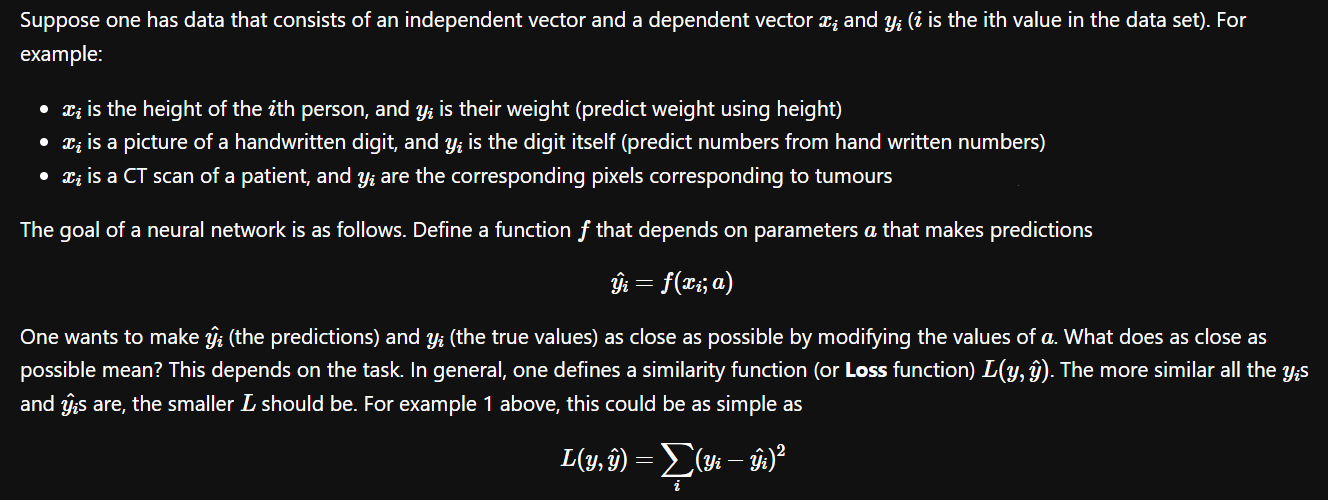

In [2]:
x = torch.tensor([[6,2], [5,2], [1,3], [7,6]]).float()
y = torch.tensor([1,5,2,5]).float()

In [3]:
x

tensor([[6., 2.],
        [5., 2.],
        [1., 3.],
        [7., 6.]])

In [4]:
y

tensor([1., 5., 2., 5.])

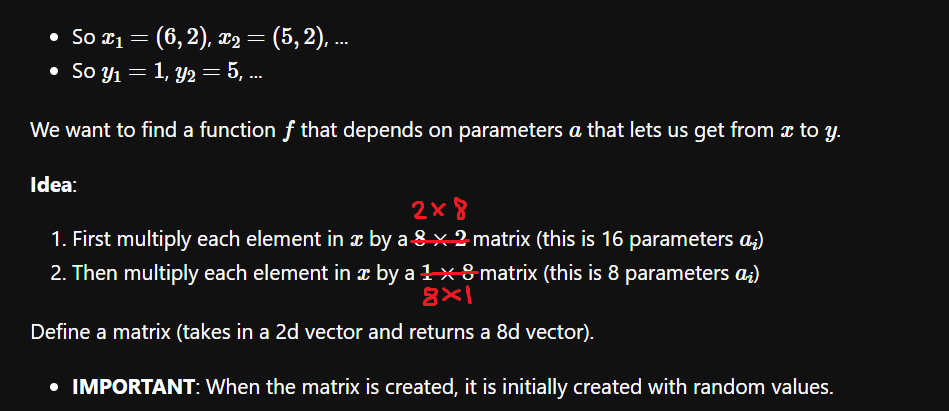

In [5]:
M1 = nn.Linear(2, 8, bias=False)
M1

Linear(in_features=2, out_features=8, bias=False)

If one passes in a vector $x$
 (the dataset) where each element $x_i$
 (an instance) is a 2d vector, $M$
 will apply the same matrix multiplication to each element $x_i$
.

In [6]:
 M1(x)

tensor([[ 2.2845,  2.1621,  2.7894, -4.4136,  2.8708, -0.9475, -0.4920,  3.9576],
        [ 1.7696,  1.7994,  2.0919, -3.7539,  2.2650, -0.6536, -0.4786,  3.5187],
        [-0.6924,  0.3417, -1.3959, -1.3432, -0.5399,  0.9299, -0.6308,  2.4249],
        [ 1.1897,  2.4968,  0.6957, -5.9846,  1.9489,  0.3903, -1.3286,  7.0445]],
       grad_fn=<MmBackward0>)

We can chain this with a second matrix M2.

In [7]:
M2 = nn.Linear(8, 1, bias=False)
M2

Linear(in_features=8, out_features=1, bias=False)

In [8]:
M2(M1(x))

tensor([[-1.1431],
        [-0.8836],
        [ 0.3616],
        [-0.5746]], grad_fn=<MmBackward0>)

In [9]:
M2(M1(x)).shape

torch.Size([4, 1])

In [13]:
y

tensor([1., 5., 2., 5.])

In [12]:
M2(M1(x)).squeeze()

tensor([-1.1431, -0.8836,  0.3616, -0.5746], grad_fn=<SqueezeBackward0>)

The weights of the matrices M1 and M2 consitute the weights 
 of the network defined above. In order to optimize for these weights, we first construct our network $f$
 as follows:

In [14]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 8, bias=False)
        self.Matrix2 = nn.Linear(8, 1, bias=False)
    def forward(self, x):
        x = self.Matrix1(x)
        x = self.Matrix2(x)
        return x.squeeze()

Constructing the network using a subclass of the nn.Module allows the parameters of the network to be conveniently stored. This will be useful later when we need to adjust them.

In [15]:
f = MyNeuralNet()

In [16]:
f(x)

tensor([-0.4695, -0.5072, -1.0059, -1.8233], grad_fn=<SqueezeBackward0>)

In [17]:
for par in f.parameters(): #to view parameters of each layer
    print(par)

Parameter containing:
tensor([[ 0.1511,  0.6042],
        [ 0.1097, -0.2906],
        [-0.6217, -0.2355],
        [ 0.6206,  0.1373],
        [-0.2279, -0.5036],
        [ 0.1421, -0.6760],
        [-0.6157, -0.6257],
        [ 0.5319, -0.4475]], requires_grad=True)
Parameter containing:
tensor([[-0.0731,  0.0059, -0.0651,  0.1312,  0.2214,  0.2264,  0.1028,  0.0145]],
       requires_grad=True)


Pass in data to the network

In [18]:
yhat = f(x)
yhat

tensor([-0.4695, -0.5072, -1.0059, -1.8233], grad_fn=<SqueezeBackward0>)

In [19]:
y

tensor([1., 5., 2., 5.])

# Adjusting $\alpha$ so that $\hat y$ and $y$ are similar

Now we define the loss function $L$
, which provides a metric of similarity between 
$y$ and $\hat y$ 
. In this case, we will use the mean squared error loss function:

In [20]:
L = nn.MSELoss()
L(y, yhat)

tensor(22.0205, grad_fn=<MseLossBackward0>)

Confirming it is doing the same as the regular mean-squared error:



In [21]:
torch.mean((y - yhat)**2)

tensor(22.0205, grad_fn=<MeanBackward0>)

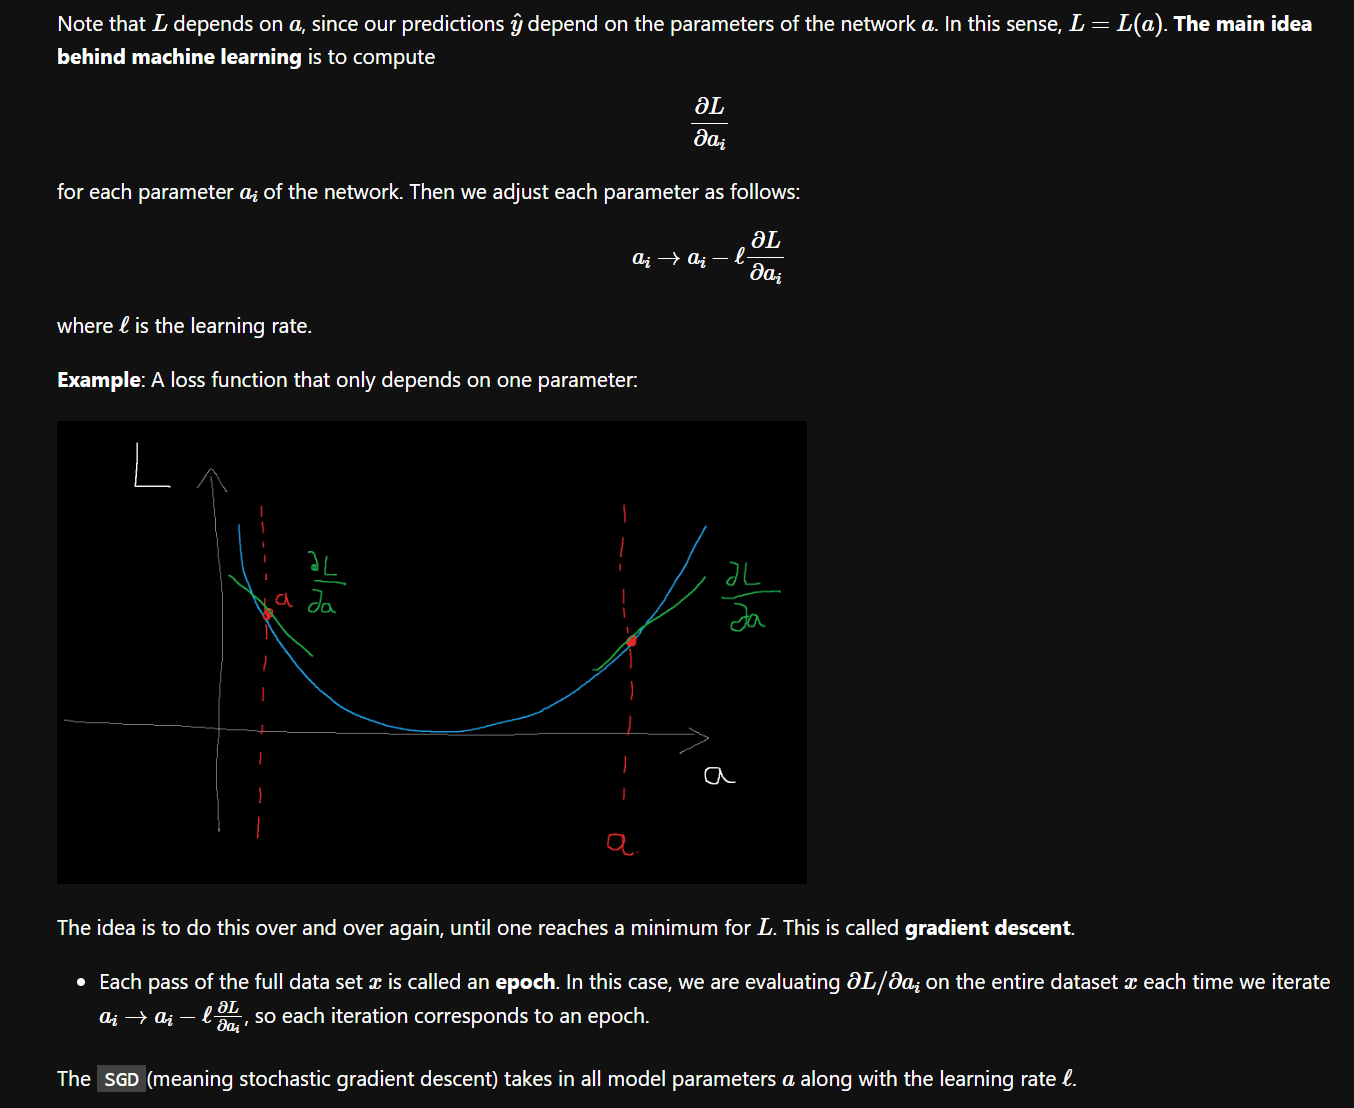

In [22]:
opt = SGD(f.parameters(), lr=0.001)

Adjust the parameters over and over:



In [23]:
losses = []
for _ in range(50):
    opt.zero_grad() #flush previous epoch's gradient
    loss_value = L(f(x), y) #compute loss
    loss_value.backward() # compute gradiet
    opt.step() # perform iteration using gradient above
    losses.append(loss_value.item())

Plot $L(\alpha)$
 as a function of number of iterations

Text(0.5, 0, 'Epochs')

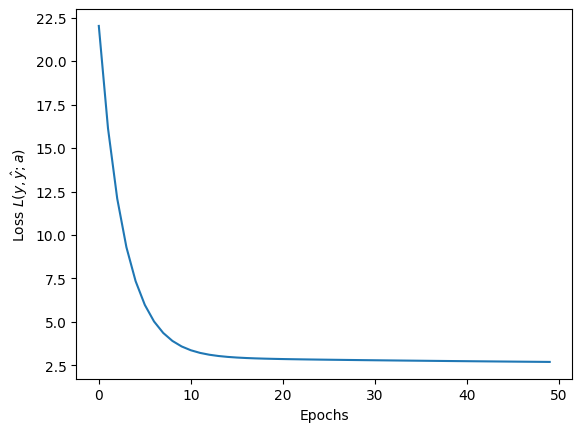

In [24]:
plt.plot(losses)
plt.ylabel('Loss $L(y, \hat{y}; a)$')
plt.xlabel('Epochs')

This is as close as we can make the model 
$f$ predict 
$y$ from $x$
:

In [25]:
f(x)

tensor([3.4120, 2.9222, 1.2000, 4.8488], grad_fn=<SqueezeBackward0>)

In [26]:
y

tensor([1., 5., 2., 5.])